### Anomalies Detection on Health Insurance Claims

1. Exploratory Data Analysis
    + Features knowledge

The document is going to lead the distribution and insights about an important feature with valuable information involved on every claim, on a first study we shall make some assumptions from the DWH

### Average days of hospitalization

In [2]:
import os
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [3]:
!pwd

/c/Users/A2276061/Documents/GMM


First we load the dataset, ans see how the datatypes are shaped

In [7]:
df = pd.read_csv("hospit-days.csv", parse_dates=True)

In [8]:
print(df[0:10])

           In         Out  Days
0  08/08/2006  11/08/2006     3
1  19/11/2004  25/11/2004     6
2  08/08/2006  11/08/2006     3
3  08/08/2006  11/08/2006     3
4  08/08/2006  11/08/2006     3
5  08/08/2006  11/08/2006     3
6  08/08/2006  11/08/2006     3
7  08/08/2006  11/08/2006     3
8  06/08/2014  07/08/2014     1
9  11/08/2001  24/08/2001    13


In [9]:
DateIn = df["In"]
AvgDays = df["Days"]

<function matplotlib.pyplot.show>

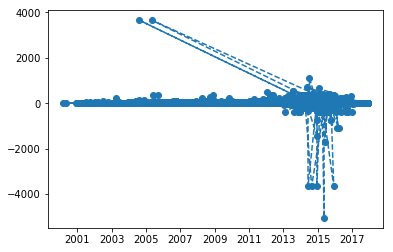

In [11]:
#This is a kind of plot that depends on a X axis and Y axis
plt.plot_date(DateIn,AvgDays, ls='--')
plt.show

When we use df.plot() and plt.show(), matplotlib infers that we are making a time series, so we create a new data frame only with the two columns we want

In [12]:
#Parsing the vector
raw_data = {'In': DateIn, 'Days': AvgDays}
df0 = pd.DataFrame(raw_data, columns = ['In', 'Days'])
#df0.head()

<function matplotlib.pyplot.show>

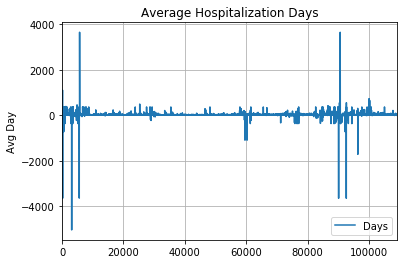

In [14]:
df0.plot()
plt.title("Average Hospitalization Days")
plt.ylabel("Avg Day")
plt.grid(True)
plt.show

In [17]:
#how the top10 looks like
df0_sort = df0.sort_values(['Days'], ascending=False)
print(df0_sort.head(10))

                In  Days
5708    13/08/2004  3654
90587   05/11/2005  3652
139     07/12/2014  1107
99991   16/05/2014   731
100185  26/01/2015   654
92605   27/07/2013   552
90355   27/07/2013   552
25290   23/01/2012   493
4876    16/09/2014   457
86574   26/02/2015   419


---

Now we now the outliers of days of hospitalization we have to see every single day what happened, we have to make a list of all those  

##### Handling Outliers

Then we have to eliminate in two ways:
    + 1 The negatives, there is no posibilities for negatives here
    + 2 More than 365 days what happen here
    + 3 Is it posible hospitalization between 0 and one year?
    + Using a variance method to deprecate all those more than 10 days for example, in order of the variance measure after this, plot again

In [18]:
#let's see all days in negatives we have
df0[df0['Days'] < 0].count()

In      227
Days    227
dtype: int64

The solution here should be from the extraction, we shall exclude the diferences between date in minus day out in negative, then we made the average by day

In [19]:
#New dataframes without negatives
df1 = df0[df0['Days'] > 0]

<function matplotlib.pyplot.show>

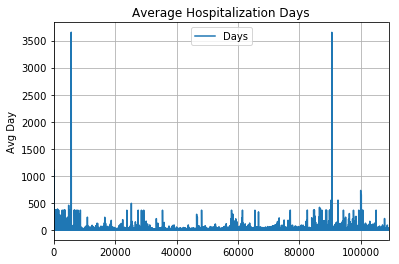

In [20]:
df1.plot()
plt.title("Average Hospitalization Days")
plt.ylabel("Avg Day")
plt.grid(True)
plt.show

let's see now all the cases where is more than 1 year, it means (likely) is a system issue

In [21]:
#Not so many of those
df0[df0['Days'] > 365].count()

In      57
Days    57
dtype: int64

In [22]:
#Set newdataframe fltered
df2 = df0[(df0['Days'] < 366) & (df0['Days'] > 0)]

In [23]:
print(df2.shape)

(108764, 2)


<function matplotlib.pyplot.show>

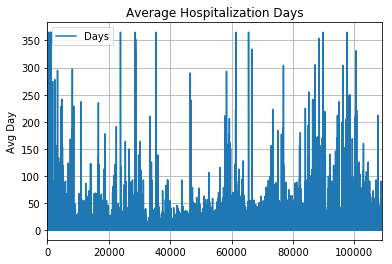

In [24]:
df2.plot()
plt.title("Average Hospitalization Days")
plt.ylabel("Avg Day")
plt.grid(True)
plt.show

In [26]:
#summary
print(df2.describe())

                Days
count  108764.000000
mean        4.721737
std        11.373258
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       365.000000


In [27]:
#The rule we gonna use is excluding all the data with days more than 2 estandart deviatin_
two_dev = 2*df2.std().astype(int)
two_dev

Days    22
dtype: int32

In [28]:
df3 = df2[df2['Days'] < 22]
df3.count()

In      104989
Days    104989
dtype: int64

<function matplotlib.pyplot.show>

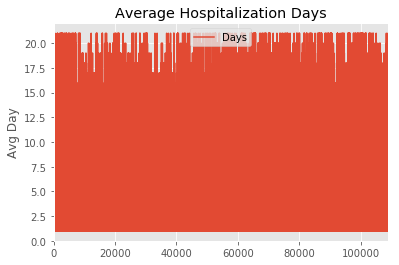

In [30]:
#not so clear but it means averything around 2 std dev
mpl.style.use('ggplot')
df3.plot()
plt.title("Average Hospitalization Days")
plt.ylabel("Avg Day")
plt.grid(True)
plt.show

What's the proportion of the information included within 2stddev

In [31]:
df3.count()/df0.count()
#this is the percentage of the data contained within 2 standart deviation

In      0.962778
Days    0.962778
dtype: float64

##### Average days in history

The patients has 3+-3 days of hospitalization over the time.  

From here we may set some questions about it  

- Avg days grouped by disease
- Avg days grouped by age, gender
- Avg days grouped by participant (agent, doctor, ofice)
- Avg days grouped by season
     

In [33]:
df3.describe()

,Days
count,104989.000000
mean,3.255836
std,3.264455
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,21.000000


This mean it makes more senese, and also one standart deviation hace to be close to zero

---

In order to have some insight about the time series we gonna wrang the dates

In [34]:
df3.dtypes
#it is such a shame to notice here that the variable In is an object, we need datetime instead

In      object
Days     int64
dtype: object

In [35]:
df3['In'] = pd.to_datetime(df3['In'])
#the error is telling me .loc[row_indexer,col_indexer] = value instead is better

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
df3.dtypes
#nos we have datetime as we wanted

In      datetime64[ns]
Days             int64
dtype: object

In [37]:
#pd.Series(np.random.randn(150).cumsum(), index=pd.date_range('2000-1-1', periods=150, freq='B'))
#just an example of series generated

In [38]:
#x, y  = df3['In'], df3['Days']
#fig, ax = plt.subplots()
#ax.plot_date(x, y, linestyle='--')
#plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#This is just an example of annotation
#ax.annotate('Test', (mdates.date2num(x[1]), y[1]), xytext=(15, 15), 
#            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
#fig.autofmt_xdate()
#plt.show()

Well, it is not very clear as we see, is it possible to check it out aggregated by month and year

In [39]:
months = df3['In'].dt.to_period("M")
dfm = df3.groupby(months).mean()
print(dfm.head())

         Days
In           
2000-03  2.00
2000-05  1.00
2000-12  3.50
2001-01  2.80
2001-02  1.75


<function matplotlib.pyplot.show>

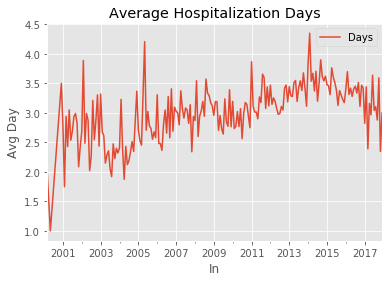

In [40]:
dfm.plot()
plt.title("Average Hospitalization Days")
plt.ylabel("Avg Day")
plt.grid(True)
plt.show

What about years

In [42]:
dfy = df3.groupby(df3['In'].map(lambda x: x.year)).mean()
dfy

,Days
In,
2000,2.500000
2001,2.650817
2002,2.814274
2003,2.468085
2004,2.535714
2005,2.906179
2006,2.852159
2007,2.959447
2008,3.141917


<function matplotlib.pyplot.show>

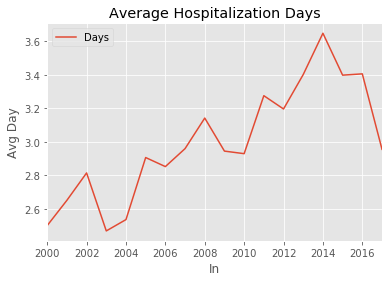

In [43]:
dfy.plot()
plt.title("Average Hospitalization Days")
plt.ylabel("Avg Day")
plt.grid(True)
plt.show

Hospitalizations Average Days Over The Years